# **Aplicación: Desarrollo de un sistema automático para la detección de paneles solares en tejados mediante imágenes aéreas o satelitales.**



# Problema propuesto a resolver

---
En el contexto de la transición energética y la expansión de fuentes renovables, la energía solar juega un papel crucial. Muchos países y ciudades están incentivando la instalación de paneles solares fotovoltaicos en tejados residenciales, industriales y comerciales. Sin embargo, monitorear la presencia, expansión y distribución de estas instalaciones a gran escala representa un desafío técnico.

Este trabajo propone el desarrollo de un sistema automático de detección de paneles solares en imágenes aéreas o satelitales mediante técnicas de visión por computador y aprendizaje profundo, utilizando el modelo YOLOv5. La aplicación de este sistema permitiría:

- Identificar zonas con alta o baja adopción de paneles solares.
- Detectar instalaciones no registradas para su incorporación en catálogos energéticos.
- Apoyar en auditorías, estudios de planificación urbana o políticas públicas.

Se parte de la hipótesis de que un modelo de detección de objetos puede ser entrenado de forma eficaz con un conjunto de imágenes etiquetadas para localizar paneles solares en tejados, diferenciándolos de otros elementos visuales como claraboyas, sombras u objetos reflectantes.

Este enfoque responde a la necesidad de herramientas automáticas, escalables y no invasivas para apoyar la gestión inteligente del territorio y el seguimiento del desarrollo energético sostenible.


---
**Todo esto es ficiticio con fines educativos**



# Desarrollo de la Aplicación
Para el desarrollo de esta actividad, se descargaron 100 imagenes de Google Imagenes, de vistas aereas de techos de casas, algunas con paneles solares otras sin paneles solares, con relativa diversidad de casas y entornos, con el fin de que se detecten los paneles solares en las imagenes y aportar con una herramienta a la problematica planteada. Las imagenes se agruparon junto con sus etiquetas.

## Importación de los archivos
Se importan 2 archivos, el primero en donde se encuentran las 100 imagenes de entrenamiento para el modelo, el segundo son imagenes de inferencia para conocer el resultado del modelo. Estas imagenes tienen que estar en .jpg para que YOLO funcione y nos aseguramos de esto en los pasos sigueintes.
Las imagenes de entrenamiento fueron etiquetadas manualmente en el software recomendado por la actividad.

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving dataset_yolo_paneles.zip to dataset_yolo_paneles.zip


In [ ]:
import zipfile

with zipfile.ZipFile("dataset_yolo_paneles.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving NuevasImagenes.zip to NuevasImagenes.zip


In [ ]:
import zipfile

with zipfile.ZipFile("/content/NuevasImagenes.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/NuevasImagenes")


In [ ]:
import os

print("Imágenes encontradas en /content/NuevasImagenes:")
for f in os.listdir("/content/NuevasImagenes"):
    if f.lower().endswith((".jpg", ".jpeg", ".png", ".jfif", ".webp")):
        print(f)


Imágenes encontradas en /content/NuevasImagenes:
images008.jfif
images011.jfif
images007.jfif
images001.jfif
images006.jfif
images002.jfif
images010.jfif
images009.jfif
images012.jfif
images003.jfif
images004.jfif


In [ ]:
from PIL import Image
import glob

ruta = "/content/NuevasImagenes"
formatos = ('*.jfif', '*.jpeg', '*.png', '*.webp')
rutas_img = []

for ext in formatos:
    rutas_img.extend(glob.glob(f'{ruta}/{ext}'))

for i, img_path in enumerate(rutas_img, 1):
    try:
        img = Image.open(img_path).convert('RGB')
        new_path = os.path.splitext(img_path)[0] + '.jpg'
        img.save(new_path, 'JPEG')
        os.remove(img_path)
        print(f"Convertido: {img_path} → {new_path}")
    except Exception as e:
        print(f"Error con {img_path}: {e}")


Convertido: /content/NuevasImagenes/images008.jfif → /content/NuevasImagenes/images008.jpg
Convertido: /content/NuevasImagenes/images011.jfif → /content/NuevasImagenes/images011.jpg
Convertido: /content/NuevasImagenes/images007.jfif → /content/NuevasImagenes/images007.jpg
Convertido: /content/NuevasImagenes/images001.jfif → /content/NuevasImagenes/images001.jpg
Convertido: /content/NuevasImagenes/images006.jfif → /content/NuevasImagenes/images006.jpg
Convertido: /content/NuevasImagenes/images002.jfif → /content/NuevasImagenes/images002.jpg
Convertido: /content/NuevasImagenes/images010.jfif → /content/NuevasImagenes/images010.jpg
Convertido: /content/NuevasImagenes/images009.jfif → /content/NuevasImagenes/images009.jpg
Convertido: /content/NuevasImagenes/images012.jfif → /content/NuevasImagenes/images012.jpg
Convertido: /content/NuevasImagenes/images003.jfif → /content/NuevasImagenes/images003.jpg
Convertido: /content/NuevasImagenes/images004.jfif → /content/NuevasImagenes/images004.jpg

**Se dividen las imagenes en entrenamiento (80) y validación (20) para el entrenamiento del modelo.**

In [ ]:
import os
import random
import shutil

# Ruta al dataset descomprimido
images_path = "/content/dataset_yolo_paneles/images_all"
labels_path = "/content/dataset_yolo_paneles/labels_all"

# Crear nuevas carpetas para train/val
for split in ['train', 'val']:
    os.makedirs(f"/content/dataset_yolo/images/{split}", exist_ok=True)
    os.makedirs(f"/content/dataset_yolo/labels/{split}", exist_ok=True)

# Obtener nombres de todas las imágenes
image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg', '.jfif'))]

# Barajar aleatoriamente
random.shuffle(image_files)

# Calcular corte 80/20
split_idx = int(0.8 * len(image_files))
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# Función para mover imagen y su .txt correspondiente
def move_files(file_list, split):
    for img_file in file_list:
        base_name = os.path.splitext(img_file)[0]
        txt_file = base_name + ".txt"

        shutil.move(os.path.join(images_path, img_file), f"/content/dataset_yolo/images/{split}/{img_file}")
        shutil.move(os.path.join(labels_path, txt_file), f"/content/dataset_yolo/labels/{split}/{txt_file}")

# Mover archivos
move_files(train_files, "train")
move_files(val_files, "val")


**Se muestran algunos ejemplos de las imagenes etiquetadas manualmente**

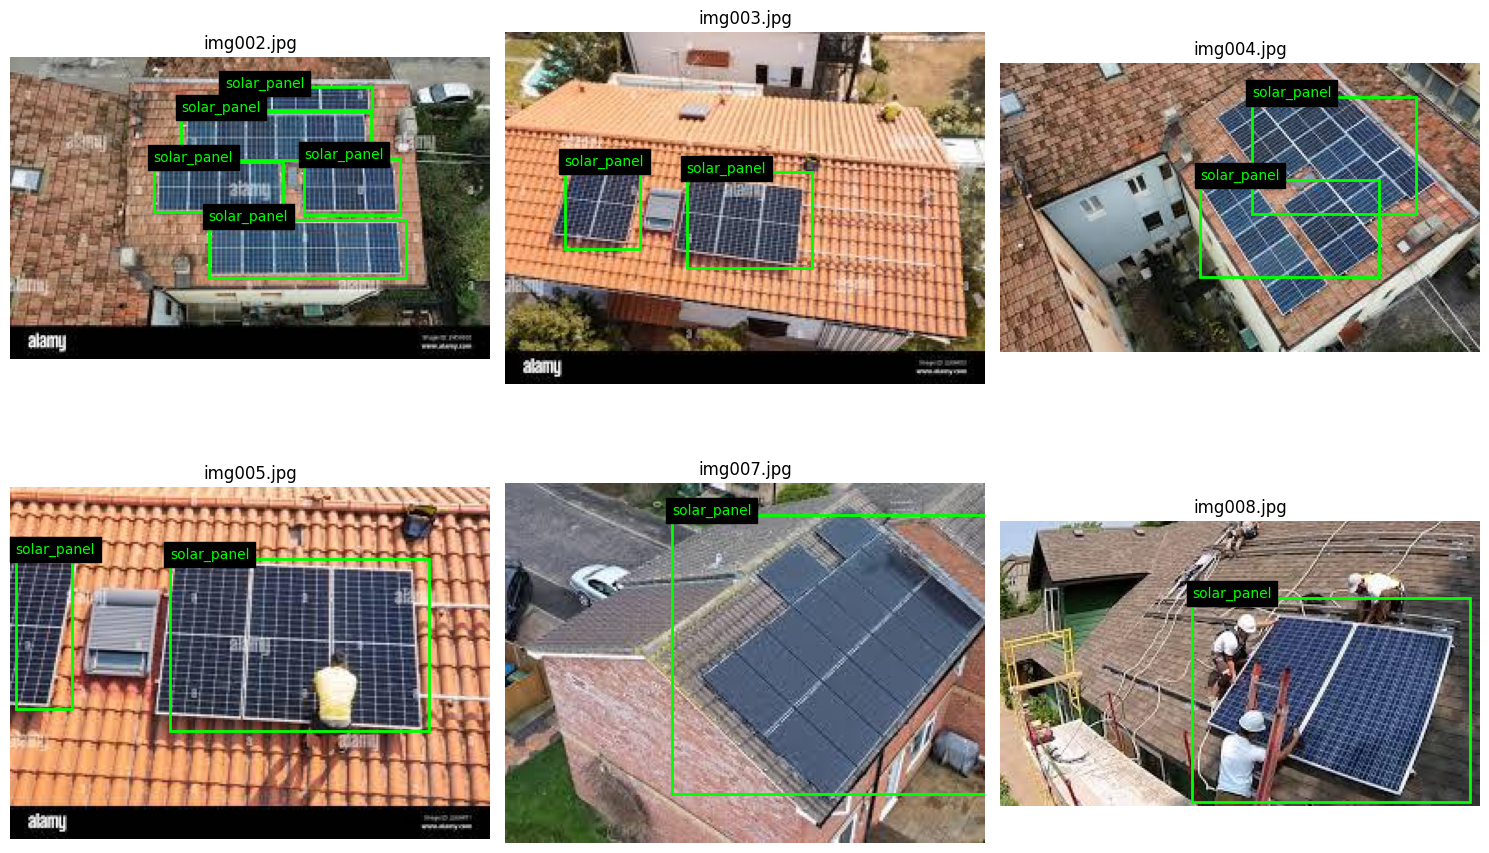

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Carpetas de imágenes y etiquetas
img_dir = "/content/dataset_yolo/images/train"
label_dir = "/content/dataset_yolo/labels/train"

# Lista de imágenes (elige las primeras 6 por ejemplo)
img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(".jpg")])[:6]

# Mostrar en cuadrícula
cols = 3
rows = (len(img_files) + cols - 1) // cols
plt.figure(figsize=(15, 5 * rows))

for i, img_name in enumerate(img_files):
    # Cargar imagen
    img_path = os.path.join(img_dir, img_name)
    img = Image.open(img_path)
    w, h = img.size

    # Cargar etiquetas
    txt_name = os.path.splitext(img_name)[0] + ".txt"
    label_path = os.path.join(label_dir, txt_name)

    # Crear subplot
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    ax = plt.gca()

    # Dibujar cajas si hay anotaciones
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                cls, x_center, y_center, bw, bh = map(float, line.strip().split())
                # Convertir a coordenadas de imagen
                x = (x_center - bw / 2) * w
                y = (y_center - bh / 2) * h
                box_w = bw * w
                box_h = bh * h
                rect = patches.Rectangle((x, y), box_w, box_h,
                                         linewidth=2, edgecolor='lime', facecolor='none')
                ax.add_patch(rect)
                ax.text(x, y, "solar_panel", color='lime', fontsize=10, backgroundcolor="black")
    plt.axis('off')
    plt.title(img_name)

plt.tight_layout()
plt.show()


## YOLO
Se utiliza YOLOv5 para este ejemplo, se clona el modelo y se crea el archivo .ymal que indica donde estan las imagenes y etiquetas, que clases tiene el dataset (solar_panel, indica la existencia de un panel solar), y cuantas clases hay.


In [ ]:
# Clonar YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Instalar dependencias
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17488, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17488 (delta 0), reused 1 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17488/17488), 16.59 MiB | 19.04 MiB/s, done.
Resolving deltas: 100% (11991/11991), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:0

### Archivo .yaml


In [ ]:
yaml_text = """
train: /content/dataset_yolo/images/train
val: /content/dataset_yolo/images/val

nc: 1
names: ['solar_panel']
"""

with open("/content/yolov5/data/solar.yaml", "w") as f:
    f.write(yaml_text)


In [ ]:
import os

train_path = "/content/dataset_yolo/images/train"
val_path = "/content/dataset_yolo/images/val"

print("Train images:", len(os.listdir(train_path)))
print("Val images:", len(os.listdir(val_path)))


Train images: 80
Val images: 20


In [ ]:
!ls /content/dataset_yolo/images/train


img002.jfif  img018.jfif  img035.jfif  img051.jfif  img068.jfif  img087.jfif
img003.jfif  img019.jfif  img036.jfif  img052.jfif  img069.jfif  img088.jfif
img004.jfif  img021.jfif  img037.jfif  img053.jfif  img070.jfif  img089.jfif
img005.jfif  img022.jfif  img038.jfif  img054.jfif  img071.jfif  img090.jfif
img007.jfif  img023.jfif  img039.jfif  img055.jfif  img072.jfif  img091.jfif
img008.jfif  img024.jfif  img040.jfif  img057.jfif  img073.jfif  img093.jfif
img009.jfif  img026.jfif  img041.jfif  img058.jfif  img074.jfif  img094.jfif
img010.jfif  img028.jfif  img042.jfif  img059.jfif  img075.jfif  img096.jfif
img011.jfif  img029.jfif  img043.jfif  img060.jfif  img076.jfif  img097.jfif
img012.jfif  img030.jfif  img044.jfif  img061.jfif  img077.jfif  img100.jfif
img013.jfif  img031.jfif  img045.jfif  img062.jfif  img078.jfif
img014.jfif  img032.jfif  img047.jfif  img063.jfif  img080.jfif
img015.jfif  img033.jfif  img048.jfif  img064.jfif  img081.jfif
img017.jfif  img034.jfif  img049.jfif 

In [ ]:
from PIL import Image
import glob
import os

# Rutas a tus imágenes
for img_path in glob.glob('/content/dataset_yolo/images/*/*.jfif'):
    img = Image.open(img_path).convert('RGB')
    new_path = img_path.replace('.jfif', '.jpg')
    img.save(new_path, 'JPEG')
    os.remove(img_path)  # Elimina el archivo .jfif


In [ ]:
!ls /content/dataset_yolo/images/train


img002.jpg  img018.jpg	img035.jpg  img051.jpg	img068.jpg  img087.jpg
img003.jpg  img019.jpg	img036.jpg  img052.jpg	img069.jpg  img088.jpg
img004.jpg  img021.jpg	img037.jpg  img053.jpg	img070.jpg  img089.jpg
img005.jpg  img022.jpg	img038.jpg  img054.jpg	img071.jpg  img090.jpg
img007.jpg  img023.jpg	img039.jpg  img055.jpg	img072.jpg  img091.jpg
img008.jpg  img024.jpg	img040.jpg  img057.jpg	img073.jpg  img093.jpg
img009.jpg  img026.jpg	img041.jpg  img058.jpg	img074.jpg  img094.jpg
img010.jpg  img028.jpg	img042.jpg  img059.jpg	img075.jpg  img096.jpg
img011.jpg  img029.jpg	img043.jpg  img060.jpg	img076.jpg  img097.jpg
img012.jpg  img030.jpg	img044.jpg  img061.jpg	img077.jpg  img100.jpg
img013.jpg  img031.jpg	img045.jpg  img062.jpg	img078.jpg
img014.jpg  img032.jpg	img047.jpg  img063.jpg	img080.jpg
img015.jpg  img033.jpg	img048.jpg  img064.jpg	img081.jpg
img017.jpg  img034.jpg	img049.jpg  img065.jpg	img082.jpg


**Se entrena el modelo con 50 epocas, para realizar el entrenamiento mas rapido, en la configuracion del Colab se escogio utilizar GPU T4 como entorno de ejecucion.**

In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data data/solar.yaml --weights yolov5s.pt --cache


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-07 04:42:29.892527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749271350.102848    2003 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749271350.169781    2003 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

El modelo obtuvo unos resultados de:
Precision: 67%
R: 42.9%
mAP50: 42.7%
mAP50-95:	14.4%
En general, el modelo aprendio a detectar paneles pero no perfectamente, cuando detecta algo suele acertar, sin embargo se le escapan ciertos paneles con frecuencia.


---


Para un primer modelo con 100 imagenes son datos buenos dentro de lo que cabe, estos resultados se pueden mejorar con el aumento de imagenes, para el caso concreto la precision es relativamente baja, cerca del 80% seria un valor optimo.

## Inferir
Para el proceso de inferir y ver como dectecta los paneles el sistema en nuevas imagenes, utilizamos el segundo archivo que subimos para probarlo.

In [ ]:
!ls /content


dataset_yolo	      dataset_yolo_paneles.zip	NuevasImagenes.zip  yolov5
dataset_yolo_paneles  NuevasImagenes		sample_data


In [ ]:
!python detect.py \
  --weights runs/train/exp/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/NuevasImagenes \
  --save-txt \
  --save-conf


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/NuevasImagenes, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/11 /content/NuevasImagenes/images001.jpg: 480x640 5 solar_panels, 28.3ms
image 2/11 /content/NuevasImagenes/images002.jpg: 640x640 1 solar_panel, 11.5ms
image 3/11 /content/NuevasImagenes/images003.jpg: 384x640 1 solar_panel, 28.0ms
image 4/11 /content/NuevasImagenes/images004.jpg: 448x640 (no detection

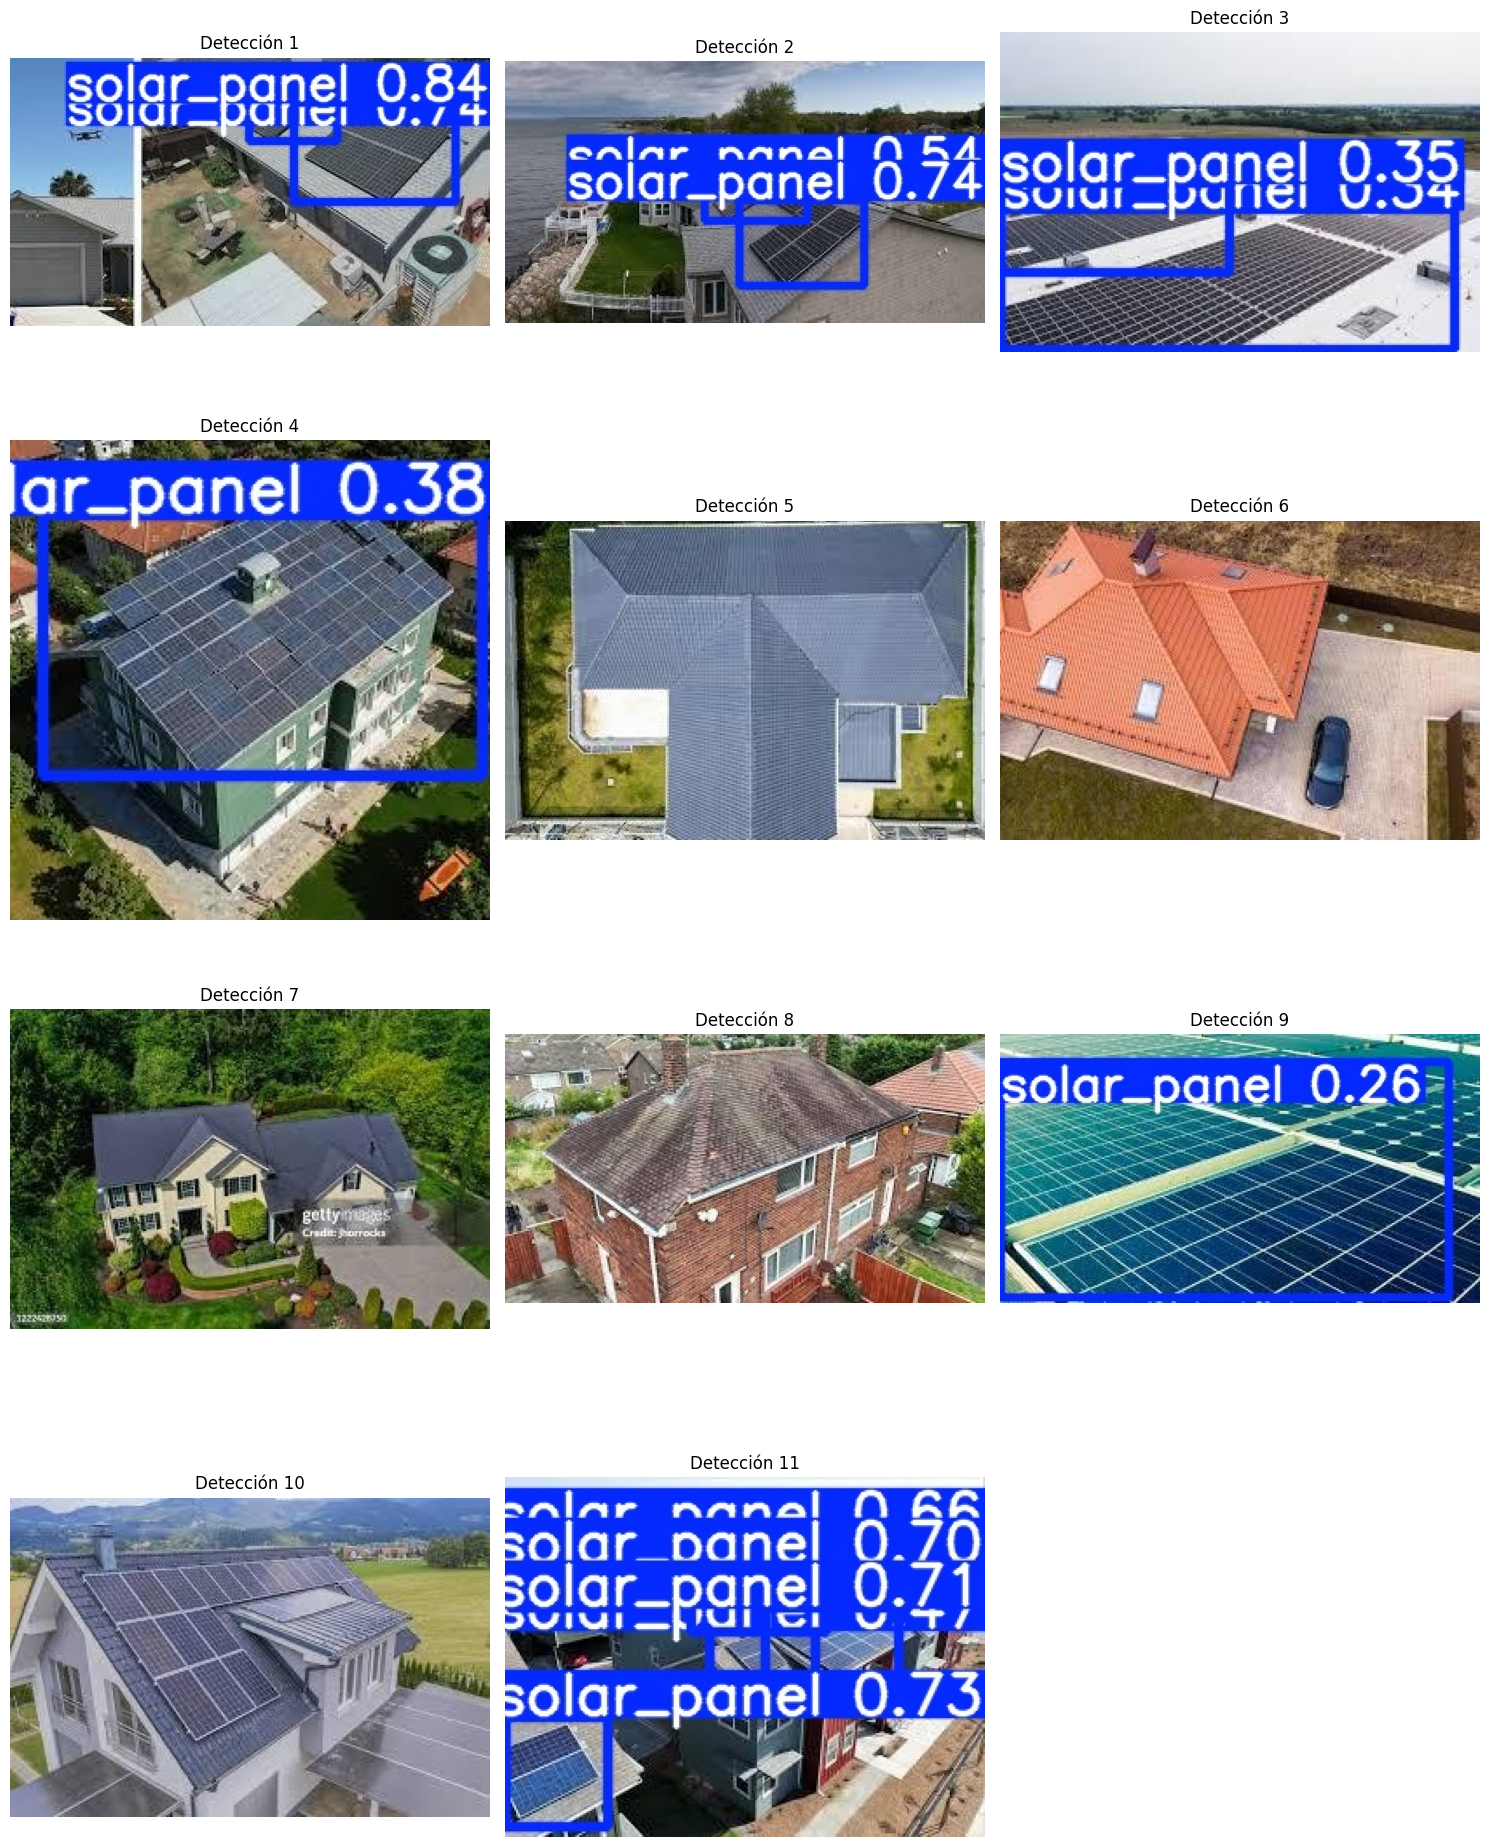

In [ ]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

# Ruta a la carpeta de resultados
resultados = sorted(glob.glob('/content/yolov5/runs/detect/exp2*/**.jpg'), key=len)

# Configura la cuadrícula
cols = 3  # cantidad de columnas
rows = (len(resultados) + cols - 1) // cols
# Tamaño del gráfico general
plt.figure(figsize=(15, 5 * rows))

# Mostrar cada imagen
for i, img_path in enumerate(resultados):
    img = Image.open(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Detección {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


El modelo en las nuevas imagenes detecta correctamente donde hay o no paneles solares, exepto en una imagen, en donde al parecer el modelo confunde los paneles con el color de la casa y no lo detecta, esto se puede debe a que existe un volumen realtivamente bajo de datos de entrenamiento y valdiacion

Exportacion


In [2]:
!jupyter nbconvert --to html "/content/YOLO_PanelesSolares.ipynb"


[NbConvertApp] WARNING | pattern '/content/YOLO_PanelesSolares.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tr